In [86]:
import clingo


class ClingoSolver:
    @staticmethod
    def _check_satisfied(control: clingo.Control) -> bool:
        with control.solve(yield_=True) as handle:
            if handle.get().satisfiable:
                return True
            return False

    @staticmethod
    def _get_answer(control: clingo.Control) -> int:
        with control.solve(yield_=True) as handle:
            for model in handle:
                for atom in model.symbols(atoms=True):
                    if atom.name == "answer":
                        answer = str(atom)
                        return answer.split("(")[1].split(")")[0]

    @staticmethod
    def solve(asp_program: str, check_satisfied: bool = True) -> bool:
        control = clingo.Control()
        control.add("base", [], asp_program)
        control.ground([("base", [])])
        control.configuration.solve.models = 1

        if check_satisfied:
            return ClingoSolver._check_satisfied(control)
        return ClingoSolver._get_answer(control)


In [87]:
ClingoSolver().solve(
    """

    x(1..9).
    y(1..9).
    n(1..9).

    {sudoku(X,Y,N): n(N)}=1 :- x(X) ,y(Y).

    subgrid(X,Y,A,B) :- x(X), x(A), y(Y), y(B),(X-1)/3 == (A-1)/3, (Y-1)/3 == (B-1)/3.

    :- sudoku(X,Y,N), sudoku(A,Y,N), X!=A.
    :- sudoku(X,Y,N), sudoku(X,B,N), Y!=B.
    :- sudoku(X,Y,V), sudoku(A,B,V), subgrid(X,Y,A,B), X != A, Y != B.

    sudoku(1,1,3). sudoku(1,2,2). sudoku(1,3,1). sudoku(1,4,5). sudoku(1,5,8). sudoku(1,6,9). sudoku(1,7,6). sudoku(1,8,7). sudoku(1,9,4). sudoku(2,1,7). sudoku(2,2,5). sudoku(2,4,6). sudoku(2,5,2). sudoku(2,6,4). sudoku(2,7,8). sudoku(2,8,1). sudoku(2,9,3). sudoku(3,1,6). sudoku(3,2,8). sudoku(3,3,4). sudoku(3,4,7). sudoku(3,5,3). sudoku(3,6,1). sudoku(3,7,5). sudoku(3,8,9). sudoku(3,9,2). sudoku(4,1,4). sudoku(4,2,3). sudoku(4,3,6). sudoku(4,4,2). sudoku(4,5,1). sudoku(4,6,5). sudoku(4,7,7). sudoku(4,8,8). sudoku(4,9,9). sudoku(5,1,9). sudoku(5,2,1). sudoku(5,3,8). sudoku(5,4,3). sudoku(5,5,6). sudoku(5,6,7). sudoku(5,7,2). sudoku(5,8,4). sudoku(5,9,5). sudoku(6,1,2). sudoku(6,2,7). sudoku(6,3,5). sudoku(6,4,4). sudoku(6,5,9). sudoku(6,6,8). sudoku(6,7,3). sudoku(6,8,6). sudoku(6,9,1). sudoku(7,1,5). sudoku(7,2,6). sudoku(7,3,7). sudoku(7,4,9). sudoku(7,5,4). sudoku(7,6,2). sudoku(7,7,1). sudoku(7,8,3). sudoku(7,9,8). sudoku(8,1,1). sudoku(8,2,4). sudoku(8,3,3). sudoku(8,4,8). sudoku(8,5,5). sudoku(8,6,6). sudoku(8,7,9). sudoku(8,8,2). sudoku(8,9,7). sudoku(9,1,8). sudoku(9,2,9). sudoku(9,3,2). sudoku(9,4,1). sudoku(9,5,7). sudoku(9,6,3). sudoku(9,7,4). sudoku(9,8,5). sudoku(9,9,6).
    1 { sudoku(2,3,N) : n(N) } 1.
    answer(N) :- sudoku(2,3,N).
    #show answer/1.



    """, check_satisfied=False
)

'9'

In [88]:
ClingoSolver().solve(
    """


% allocate one colour to each node
1{colouring(Node, Colour): colour(Colour)}1 :- node(Node).

% filter out all colourings where two nodes connected by an edge have the same colour
:- edge(Node1, Node2), colouring(Node1, Colour), colouring(Node2, Colour).

% defining colored node facts

% define the answer as the colour of the grey node
1 { colouring(0,COLOUR) : colour(COLOUR) } 1.
answer(COLOUR) :- colouring(0,COLOUR).

% outputing the answer
#show answer/1.

colouring(1,blue).

% define the answer as the colour of the grey node
1 { colouring(0,COLOUR) : colour(COLOUR) } 1.
answer(COLOUR) :- colouring(0,COLOUR).

% outputing the answer
#show answer/1.

colouring(2,green).

% define the answer as the colour of the grey node
1 { colouring(0,COLOUR) : colour(COLOUR) } 1.
answer(COLOUR) :- colouring(0,COLOUR).

% outputing the answer
#show answer/1.

colouring(3,red).

% define the answer as the colour of the grey node
1 { colouring(0,COLOUR) : colour(COLOUR) } 1.
answer(COLOUR) :- colouring(0,COLOUR).

% outputing the answer
#show answer/1.

% defining available colours
colour(blue).
colour(red).
colour(green).

% defining nodes and edges
node(0).
node(1).
node(2).
node(3).
edge(0, 3).
edge(1, 2).
edge(1, 3).
edge(2, 3).




    """, check_satisfied=False
)

'green'

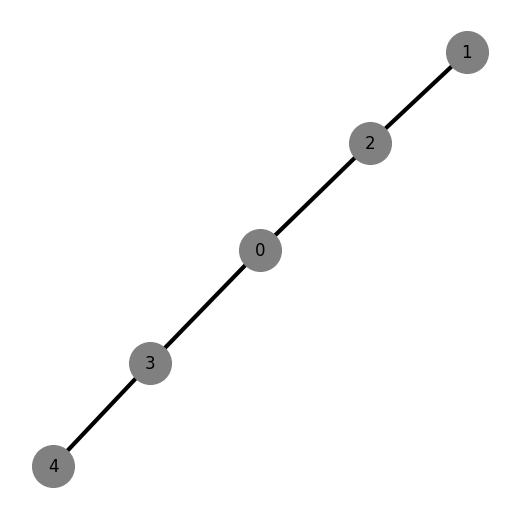

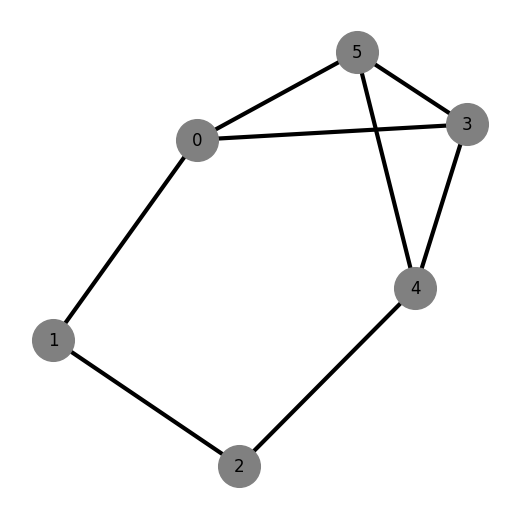

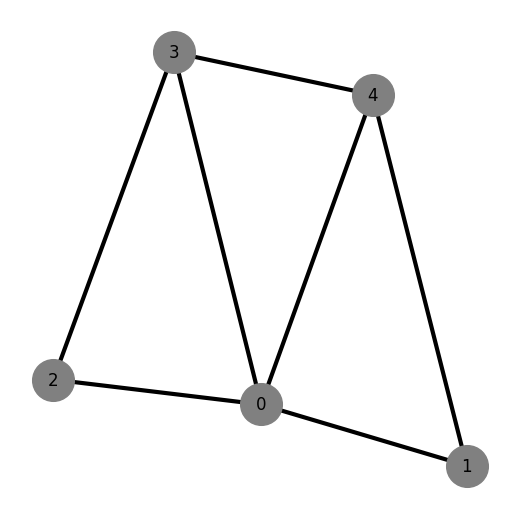

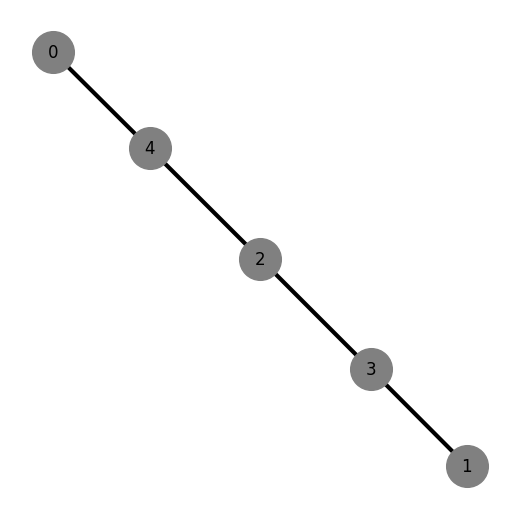

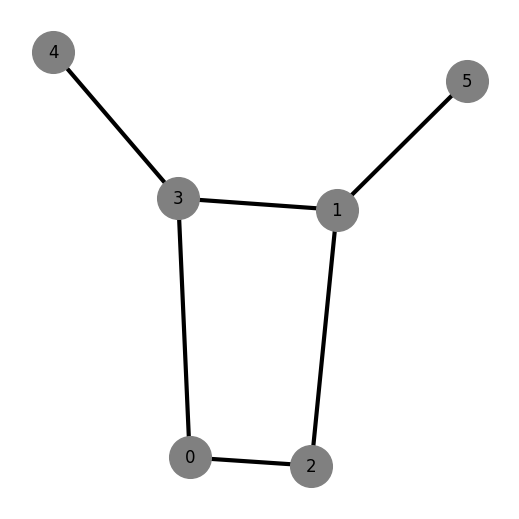

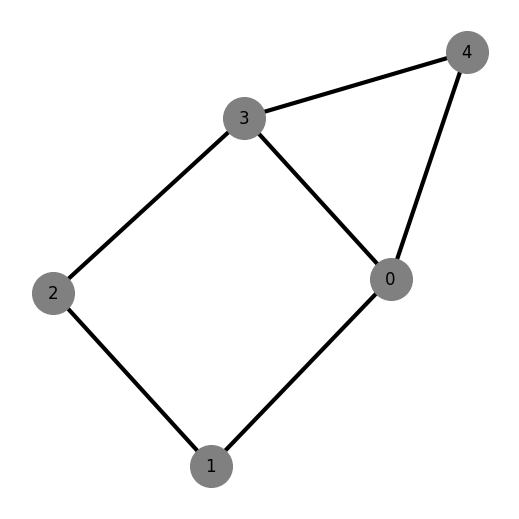

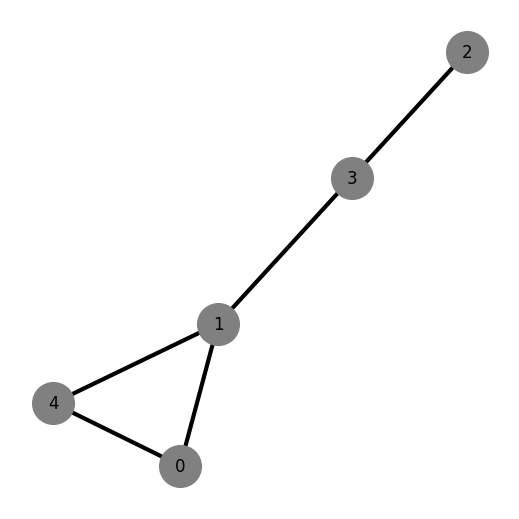

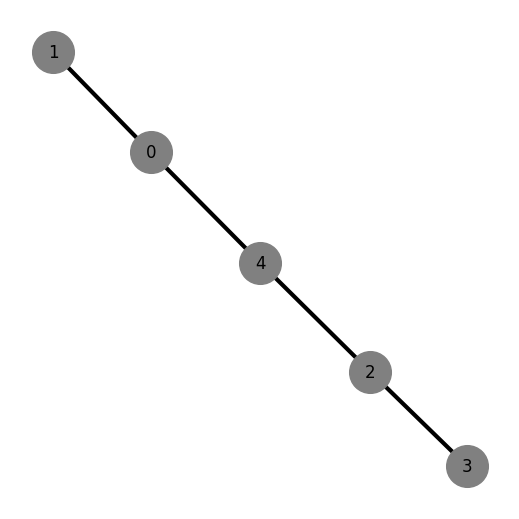

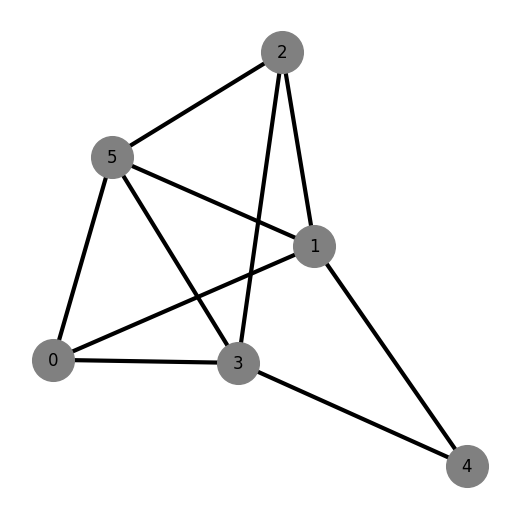

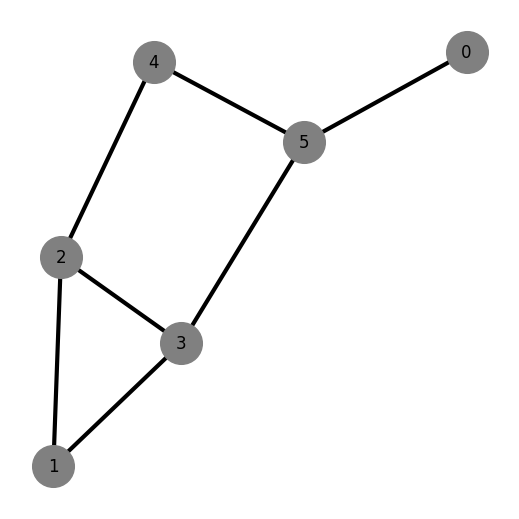

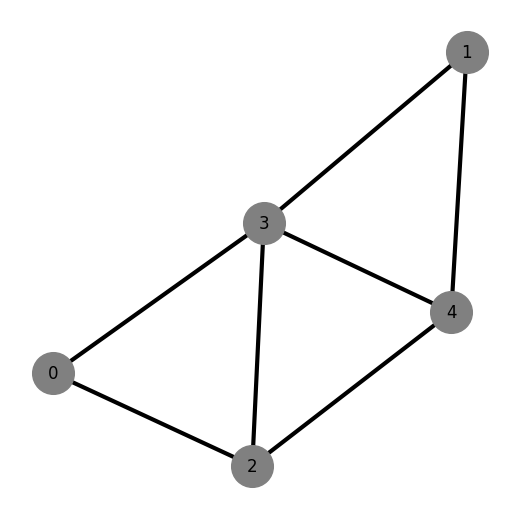

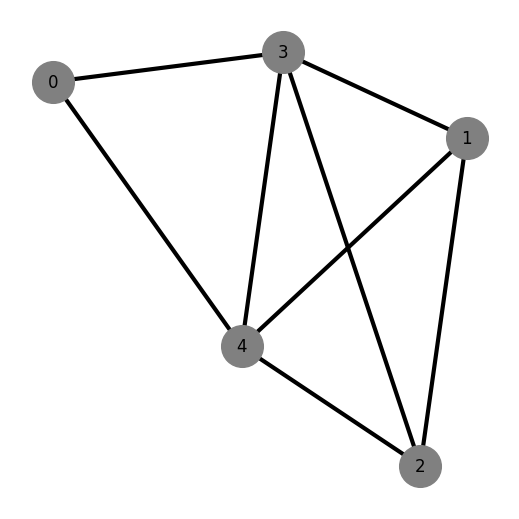

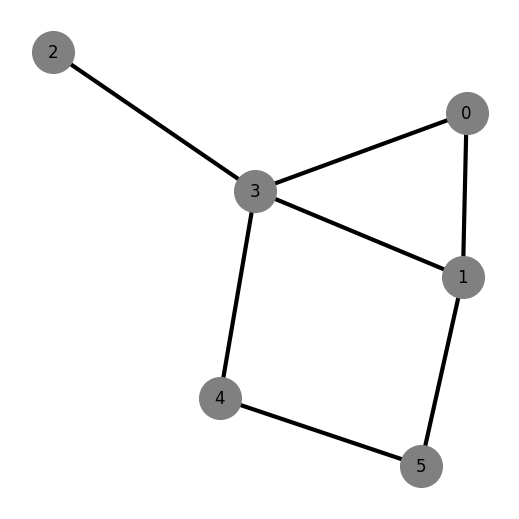

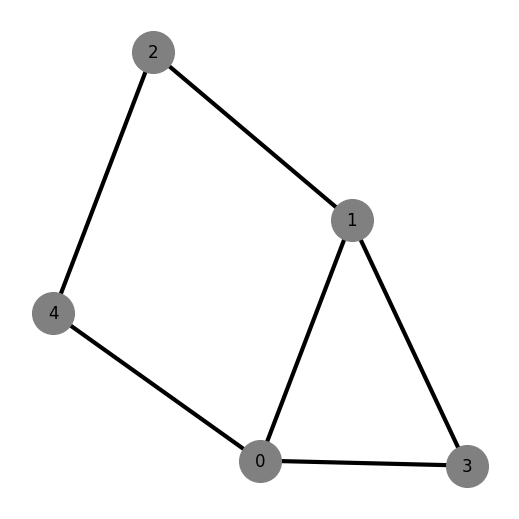

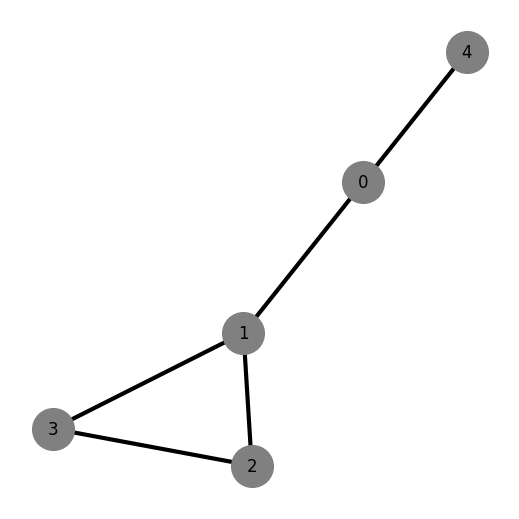

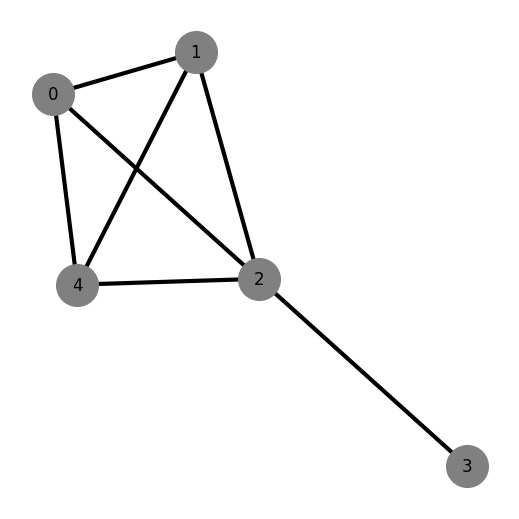

In [1]:
from generators.graph import export_data

export_data("./data", 10, fill_in=False)

In [7]:
import numpy as np

a = np.array([1, 2, 3])

np.random.shuffle(a)
a

array([1, 2, 3])